In [1]:
import datetime
import os
from datetime import datetime
from datetime import date
import time
from datetime import timedelta
import numpy as np
import pandas as pd
import matplotlib
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.font_manager import FontProperties
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.dates as mdates
from matplotlib.dates import AutoDateLocator, DateFormatter
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
#pip install scipy, pip install scipy-1.2.0-cp36-cp36m-win_amd64.whl
import scipy.io as sio
from scipy import stats
from scipy import ndimage
from skimage import data, io, filters
from mpl_toolkits.basemap import Basemap

import netCDF4# pip install netCDF4
import h5py# pip install h5py
import shapefile# pip install pyshp
from netCDF4 import Dataset
import xlrd# pip install xlrd,  .xls and .xlsx,
import xlwt# pip install xlwt, .xls
import pathlib#pip install pathlib2
from pathlib import Path

import seaborn as sns
import xgboost as xgb#pip install xgboost
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier#模型融合voting

# 机器学习算法
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.regression import mean_squared_error, r2_score

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.sans-serif'] = 'Times New Roman'
#matplotlib.rcParams['font.family']='sans-serif' 
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['Times New Roman'] 
plt.rcParams['axes.unicode_minus']=False 
plt.rcParams['axes.unicode_minus']=False 
font = FontProperties(fname=r"C:\\Windows\\Fonts\\times.ttf") 
%matplotlib inline

In [2]:

def get_filename(filename):
  (filepath,tempfilename) = os.path.split(filename);
  (shotname,extension) = os.path.splitext(tempfilename);
  #return filepath, shotname, extension
  return shotname

def Normaltime1(datetime1):
    Normaltime = datetime.strptime(datetime1,'%Y-%m-%d %H_%M')
    return Normaltime

def Changestr(datetime1):
    str1 = datetime1.strftime('%Y-%m-%d %H:%M')
    return str1

def TS(x):
    return (x - np.datetime64('1970-01-01T00:00:00Z'))/np.timedelta64(1, 's')
    #return datetime.utcfromtimestamp(x.astype('O')/1e9)
    #return datetime.fromtimestamp(x.tolist()/1e9)

def DT(x):
    return datetime.utcfromtimestamp(x)

In [4]:
path=pathlib.Path('D:\\China_Air_Pollution\\')
xlsfile=path/'MET_AQI_Plume.xlsx'
AQI=pd.DataFrame(pd.read_excel(xlsfile, sheet_name=u'MET-AQI-Plume'))

In [5]:
AQI.head()

,Time,T_1000,RH_1000,U_1000,V_1000,T_950,RH_950,U_950,V_950,T_850,RH_850,U_850,V_850,Length,PM2.5
0,2019-03-01 08:00:00,7.849932,52.958937,-2.352791,-0.580595,5.241475,52.606887,-4.372481,0.113507,-1.663570,44.400302,-6.621171,-1.829805,525.164055,130
1,2019-03-01 14:00:00,10.646423,35.185141,-2.338713,0.276522,6.647556,39.859326,-1.962367,-0.106135,-1.661481,48.781905,-2.798587,-0.916063,591.561238,158
2,2019-03-02 08:00:00,7.562657,34.668958,-3.867559,-1.899301,5.867212,27.004722,-6.494471,-0.762485,-1.668793,32.984824,-8.878307,-0.432165,493.341676,217
3,2019-03-02 14:00:00,9.047085,35.953467,-2.937487,0.702935,5.217449,37.953971,-3.109236,-0.062378,-2.208870,39.098135,-5.593493,-1.876136,490.615811,182
4,2019-03-03 08:00:00,5.380412,50.268605,1.113157,-1.399960,4.987629,34.416814,-1.269741,-2.160126,-2.408396,38.743706,-5.151451,-1.905307,588.106414,117


In [6]:
AQI.tail()

,Time,T_1000,RH_1000,U_1000,V_1000,T_950,RH_950,U_950,V_950,T_850,RH_850,U_850,V_850,Length,PM2.5
39,2019-03-21 14:00:00,10.284979,43.746154,-1.982076,-7.452112,5.919444,53.715370,-1.853499,-8.105031,-2.617323,58.893844,1.194808,-9.524120,293.160352,21
40,2019-03-22 08:00:00,3.119819,55.625482,-3.984873,-2.425240,0.271096,38.108588,-6.069322,-3.468537,-4.371267,26.636021,-2.298356,-8.165089,836.391995,21
41,2019-03-22 14:00:00,7.282694,36.476786,-2.213890,0.654889,3.040427,43.705716,-1.793434,0.209600,-3.761200,32.689863,-0.093777,-5.749891,921.371161,15
42,2019-03-23 08:00:00,5.952872,51.417526,6.439247,-4.325653,3.904341,50.470796,6.763036,-7.511312,-2.588073,55.573150,4.820303,-8.612951,492.798176,63
43,2019-03-23 14:00:00,9.303021,30.173177,1.147882,-5.023186,5.099405,37.311716,1.754165,-4.982862,-3.595103,66.481961,4.399847,-3.586937,421.457894,8


In [7]:
AQI.describe()

,T_1000,RH_1000,U_1000,V_1000,T_950,RH_950,U_950,V_950,T_850,RH_850,U_850,V_850,Length,PM2.5
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,9.337636,44.856584,0.771622,-0.311932,6.941929,43.358477,1.216479,-0.765859,1.101606,35.277208,2.580530,-2.036226,670.152002,76.318182
std,3.946294,20.298342,3.633052,4.265811,3.429499,19.370090,4.765949,5.486105,3.727875,18.547678,5.346839,5.616128,544.279746,55.145378
min,1.259322,16.804770,-5.799029,-8.300649,-0.187499,14.878007,-6.494471,-10.161595,-4.371267,4.290324,-8.878307,-10.971523,263.300449,8.000000
25%,6.683073,29.030797,-2.234537,-3.478189,5.049523,30.669140,-1.880716,-5.153598,-1.933870,24.268599,-1.064440,-6.016077,416.845233,32.750000
50%,8.987018,39.357416,0.347326,0.268800,6.155010,38.031279,0.606357,-0.420582,0.840423,30.911770,2.948429,-2.094920,527.640004,55.000000
75%,10.924035,55.464919,3.438570,2.956405,9.293619,50.674771,5.063145,2.723250,3.453580,44.920053,5.909688,1.243459,671.641543,118.250000
max,19.590598,99.206013,8.750817,6.895795,15.185367,100.714122,12.495504,10.178405,9.288396,100.262165,15.708990,9.621579,3016.913504,217.000000


In [8]:
AQI=AQI.drop(columns=['RH_1000','RH_950','RH_850'])

In [9]:
Variables=AQI.columns.values.tolist()
Variables

['Time',
 'T_1000',
 'U_1000',
 'V_1000',
 'T_950',
 'U_950',
 'V_950',
 'T_850',
 'U_850',
 'V_850',
 'Length',
 'PM2.5']

In [10]:
x_cols =Variables[1:-1]
y_cols=Variables[-1]
x_cols

['T_1000',
 'U_1000',
 'V_1000',
 'T_950',
 'U_950',
 'V_950',
 'T_850',
 'U_850',
 'V_850',
 'Length']

In [11]:
y_cols

'PM2.5'

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [13]:
Ran=list(range(1,100,1))
Ran

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [14]:
MSE_train=[]
MSE_test=[]
R2_train=[]
R2_test=[]
for i in Ran:
    X=AQI[x_cols]
    y=AQI[y_cols]
    X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=i)
    linreg = LinearRegression()
    model=linreg.fit(X_train, y_train)
    titlestr=str(i)+' Predict the particle concentration '
    pairs=list(zip(x_cols, linreg.coef_))
    #print(pairs)
    y_train_pred=linreg.predict(X_train)
    y_pred = linreg.predict(X_test)
    
    MSE_train_A=mean_squared_error(y_train,y_train_pred)
    MSE_test_A=mean_squared_error(y_test,y_pred)
    R2_train_A=r2_score(y_train,y_train_pred)
    R2_test_A=r2_score(y_test,y_pred)
    
    MSE_train.append(MSE_train_A)
    MSE_test.append(MSE_test_A)
    R2_train.append(R2_train_A)
    R2_test.append(R2_test_A)
    
    from sklearn import metrics
    #print (len(y_pred),len(y_test))
    sum_mean=0
    for i in range(len(y_pred)):
        sum_mean+=(y_pred[i]-y_test.values[i])**2
    sum_error=np.sqrt(sum_mean/11)

In [15]:
MSE_train=np.array(MSE_train)
print(MSE_train.min())
print(MSE_train.argmin(axis=0))

MSE_test=np.array(MSE_test)
print(MSE_test.min())
print(MSE_test.argmin(axis=0))

R2_train=np.array(R2_train)
print(R2_train.max())
print(R2_train.argmax(axis=0))

R2_test=np.array(R2_test)
print(R2_test.max())
print(R2_test.argmax(axis=0))

1013.4244269360199
33
1065.518112965514
14
0.6239984225755133
73
0.5887552657083845
14


截距: 79
[('T_1000', -0.8686276971254134), ('U_1000', -1.7302587837404406), ('V_1000', 1.7784015542776945), ('T_950', 5.317998657015675), ('U_950', 10.605012835912715), ('V_950', -1.4337751988709504), ('T_850', 1.1801707730030904), ('U_850', -12.977797728817755), ('V_850', -1.151149119072693), ('Length', -0.021008604452043)]
RMSE:  33
MSE train: 1961.659,test:1065.518
R^2 train: 0.356,test:0.589


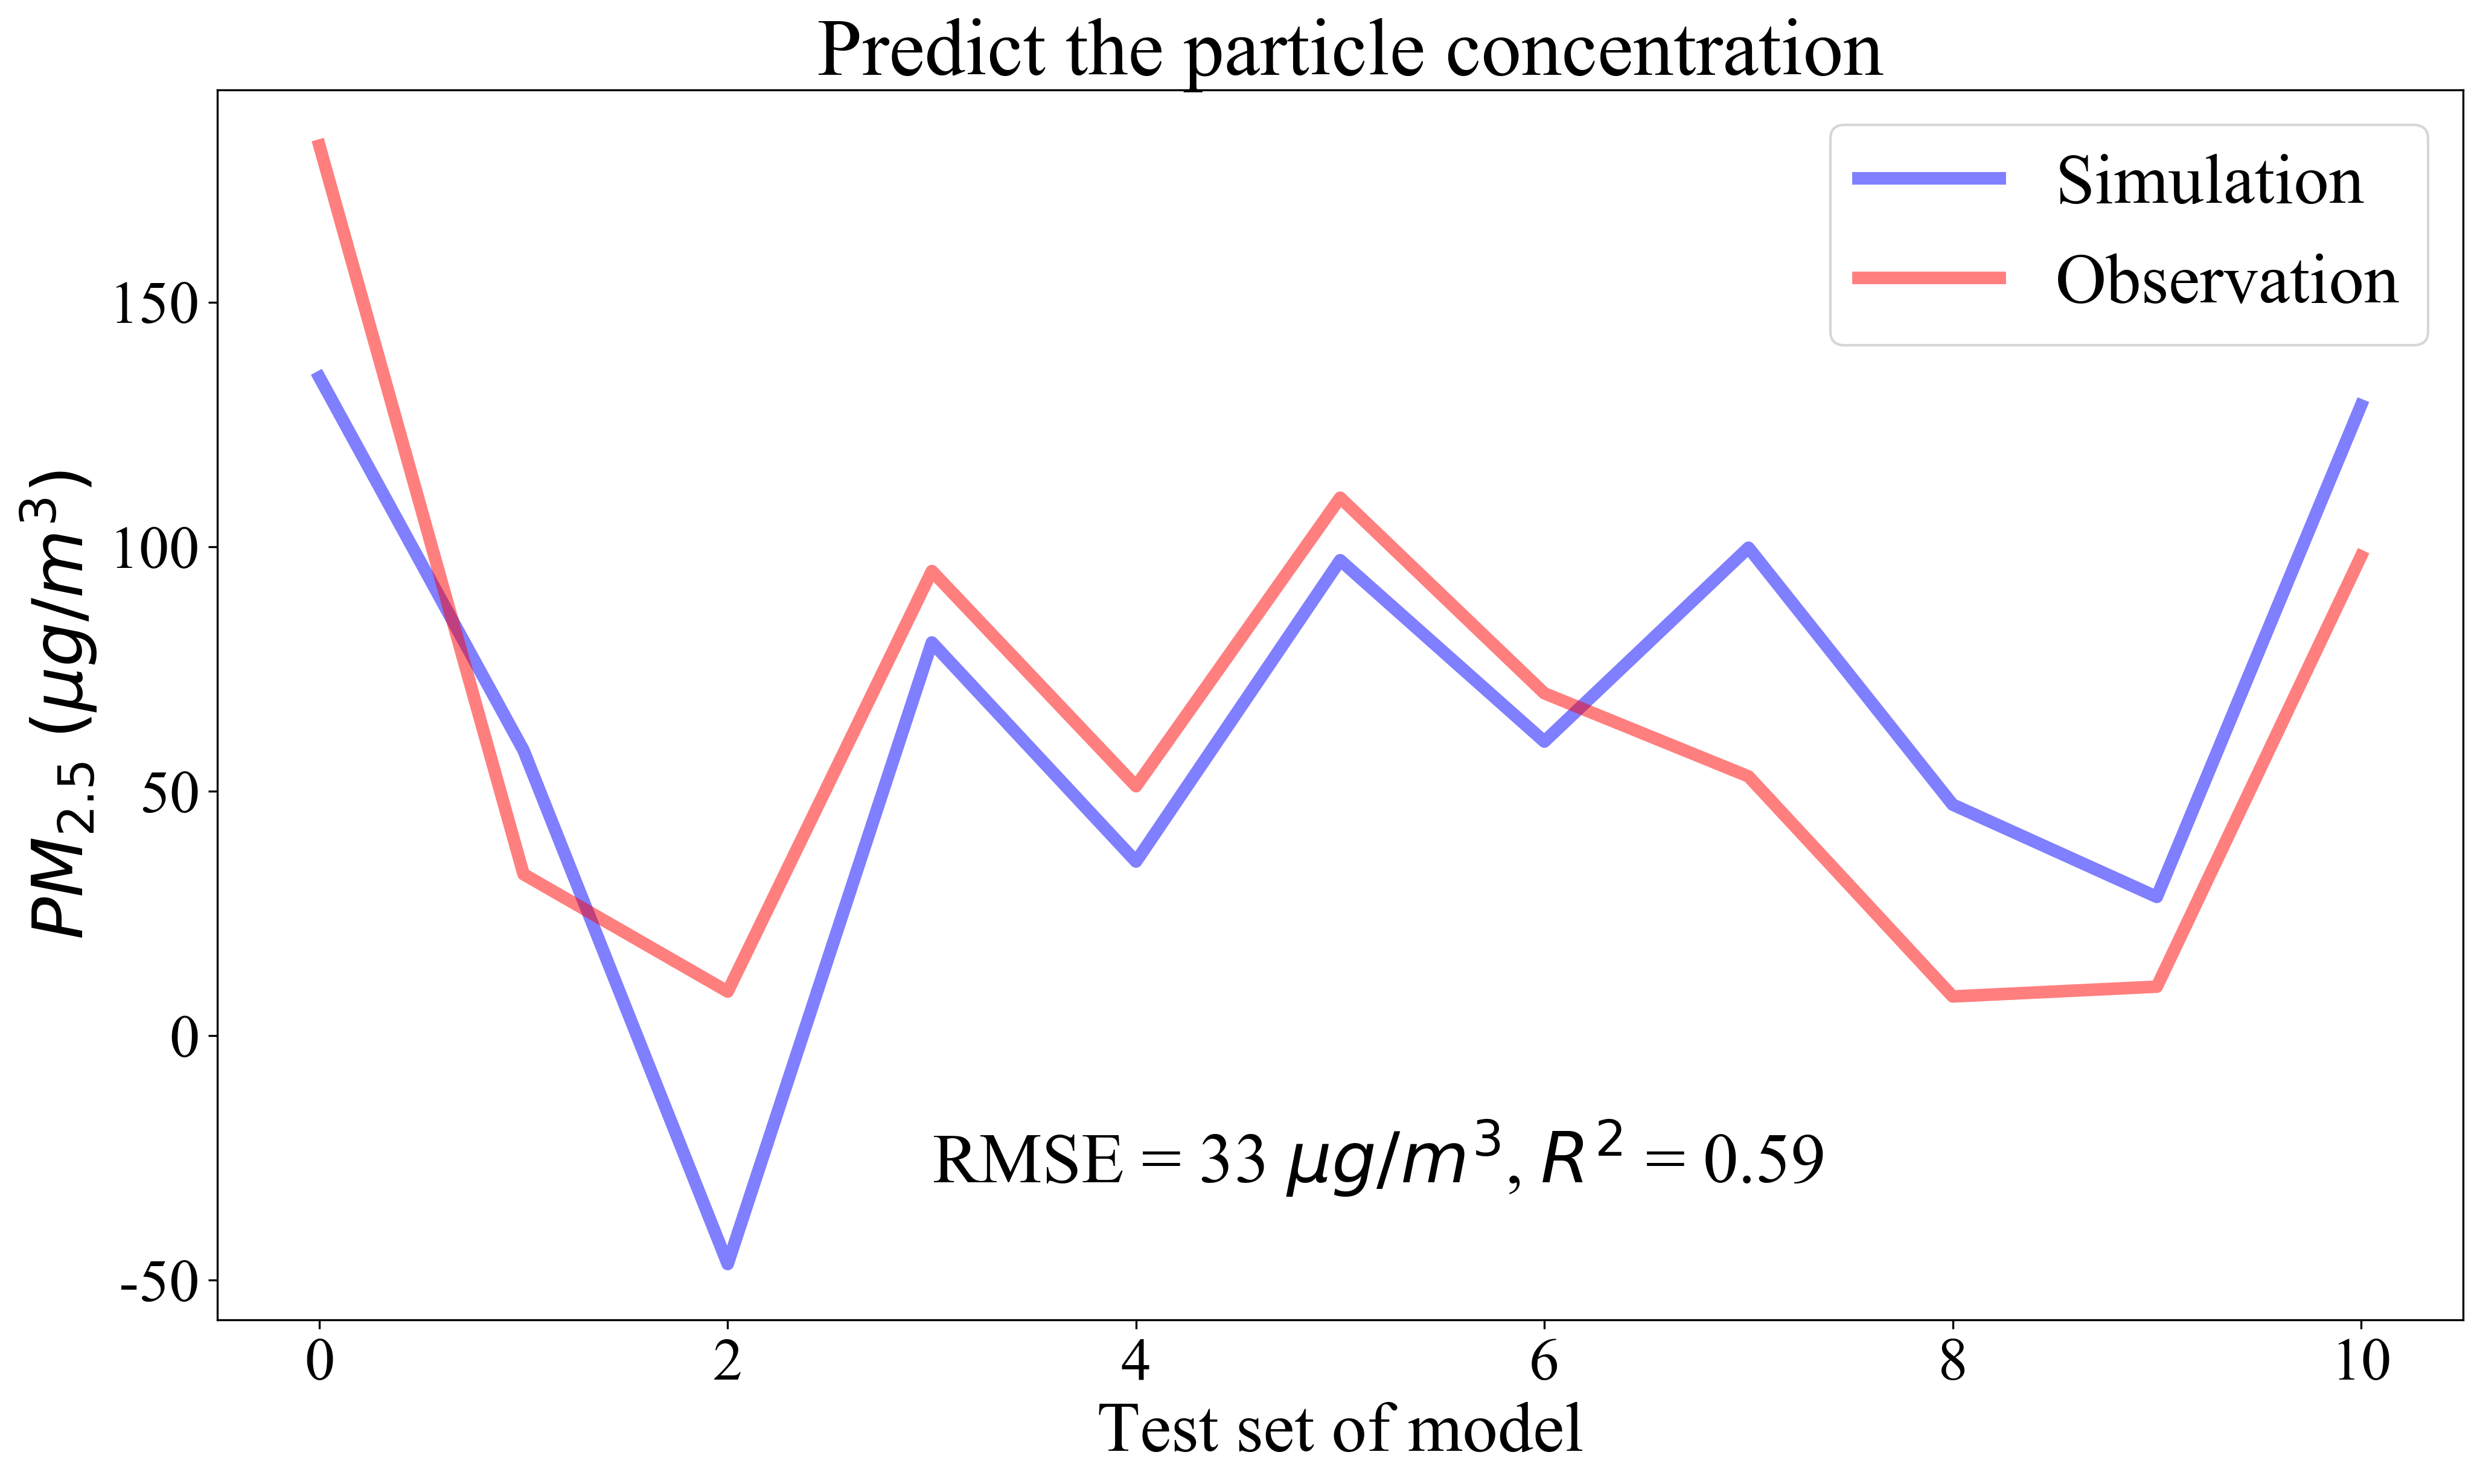

<Figure size 432x288 with 0 Axes>

In [16]:
X=AQI[x_cols]
y=AQI[y_cols]
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=15)
linreg = LinearRegression()
model=linreg.fit(X_train, y_train)
#print (model)
print ("截距: "'%.0f'% linreg.intercept_)
#print (linreg.coef_)
#Mat=np.array(linreg.coef_).reshape(4,3)
#print(Mat)
#print("矩阵的秩: ",np.linalg.matrix_rank(Mat))
pairs=list(zip(x_cols, linreg.coef_))
print(pairs)

y_pred = linreg.predict(X_test)
y_train_pred=linreg.predict(X_train)
from sklearn import metrics
#print (len(y_pred),len(y_test))
sum_mean=0
for i in range(len(y_pred)):
    sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_error=np.sqrt(sum_mean/11)
print ("RMSE: ",'%.0f'% sum_error)

print ('MSE train: %.3f,test:%.3f' % (mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_pred)))
#评估决定系数(coefficient of determination)，是MSE的标准化
print ('R^2 train: %.3f,test:%.3f' % (r2_score(y_train,y_train_pred),r2_score(y_test,y_pred)))
fig = plt.figure(figsize=(16,9),dpi= 300)
plt.subplot(111)
plt.tick_params(labelsize=24)
plt.plot(range(len(y_pred)),y_pred,'b',linestyle='solid',linewidth=5, alpha=0.5,label="Simulation")
plt.plot(range(len(y_pred)),y_test,'r',linestyle='solid',linewidth=5, alpha=0.5,label="Observation")
plt.legend(loc="upper right",fontsize=28) #显示图中的标签
plt.xlabel("Test set of model",fontsize=28)
plt.ylabel('$PM_{2.5}$'+ ' '+'$ (µg/m^3)$',fontsize=28)
titlestr='  Predict the particle concentration '
plt.title(titlestr,fontsize=32)
plt.text(3,-30,'RMSE = 33 $ µg/m^3$, $R^2$ = 0.59',fontsize=28)
plt.savefig(str(titlestr)+'.png')
plt.show()
plt.clf()

44.290616757398595 32.642274935511374


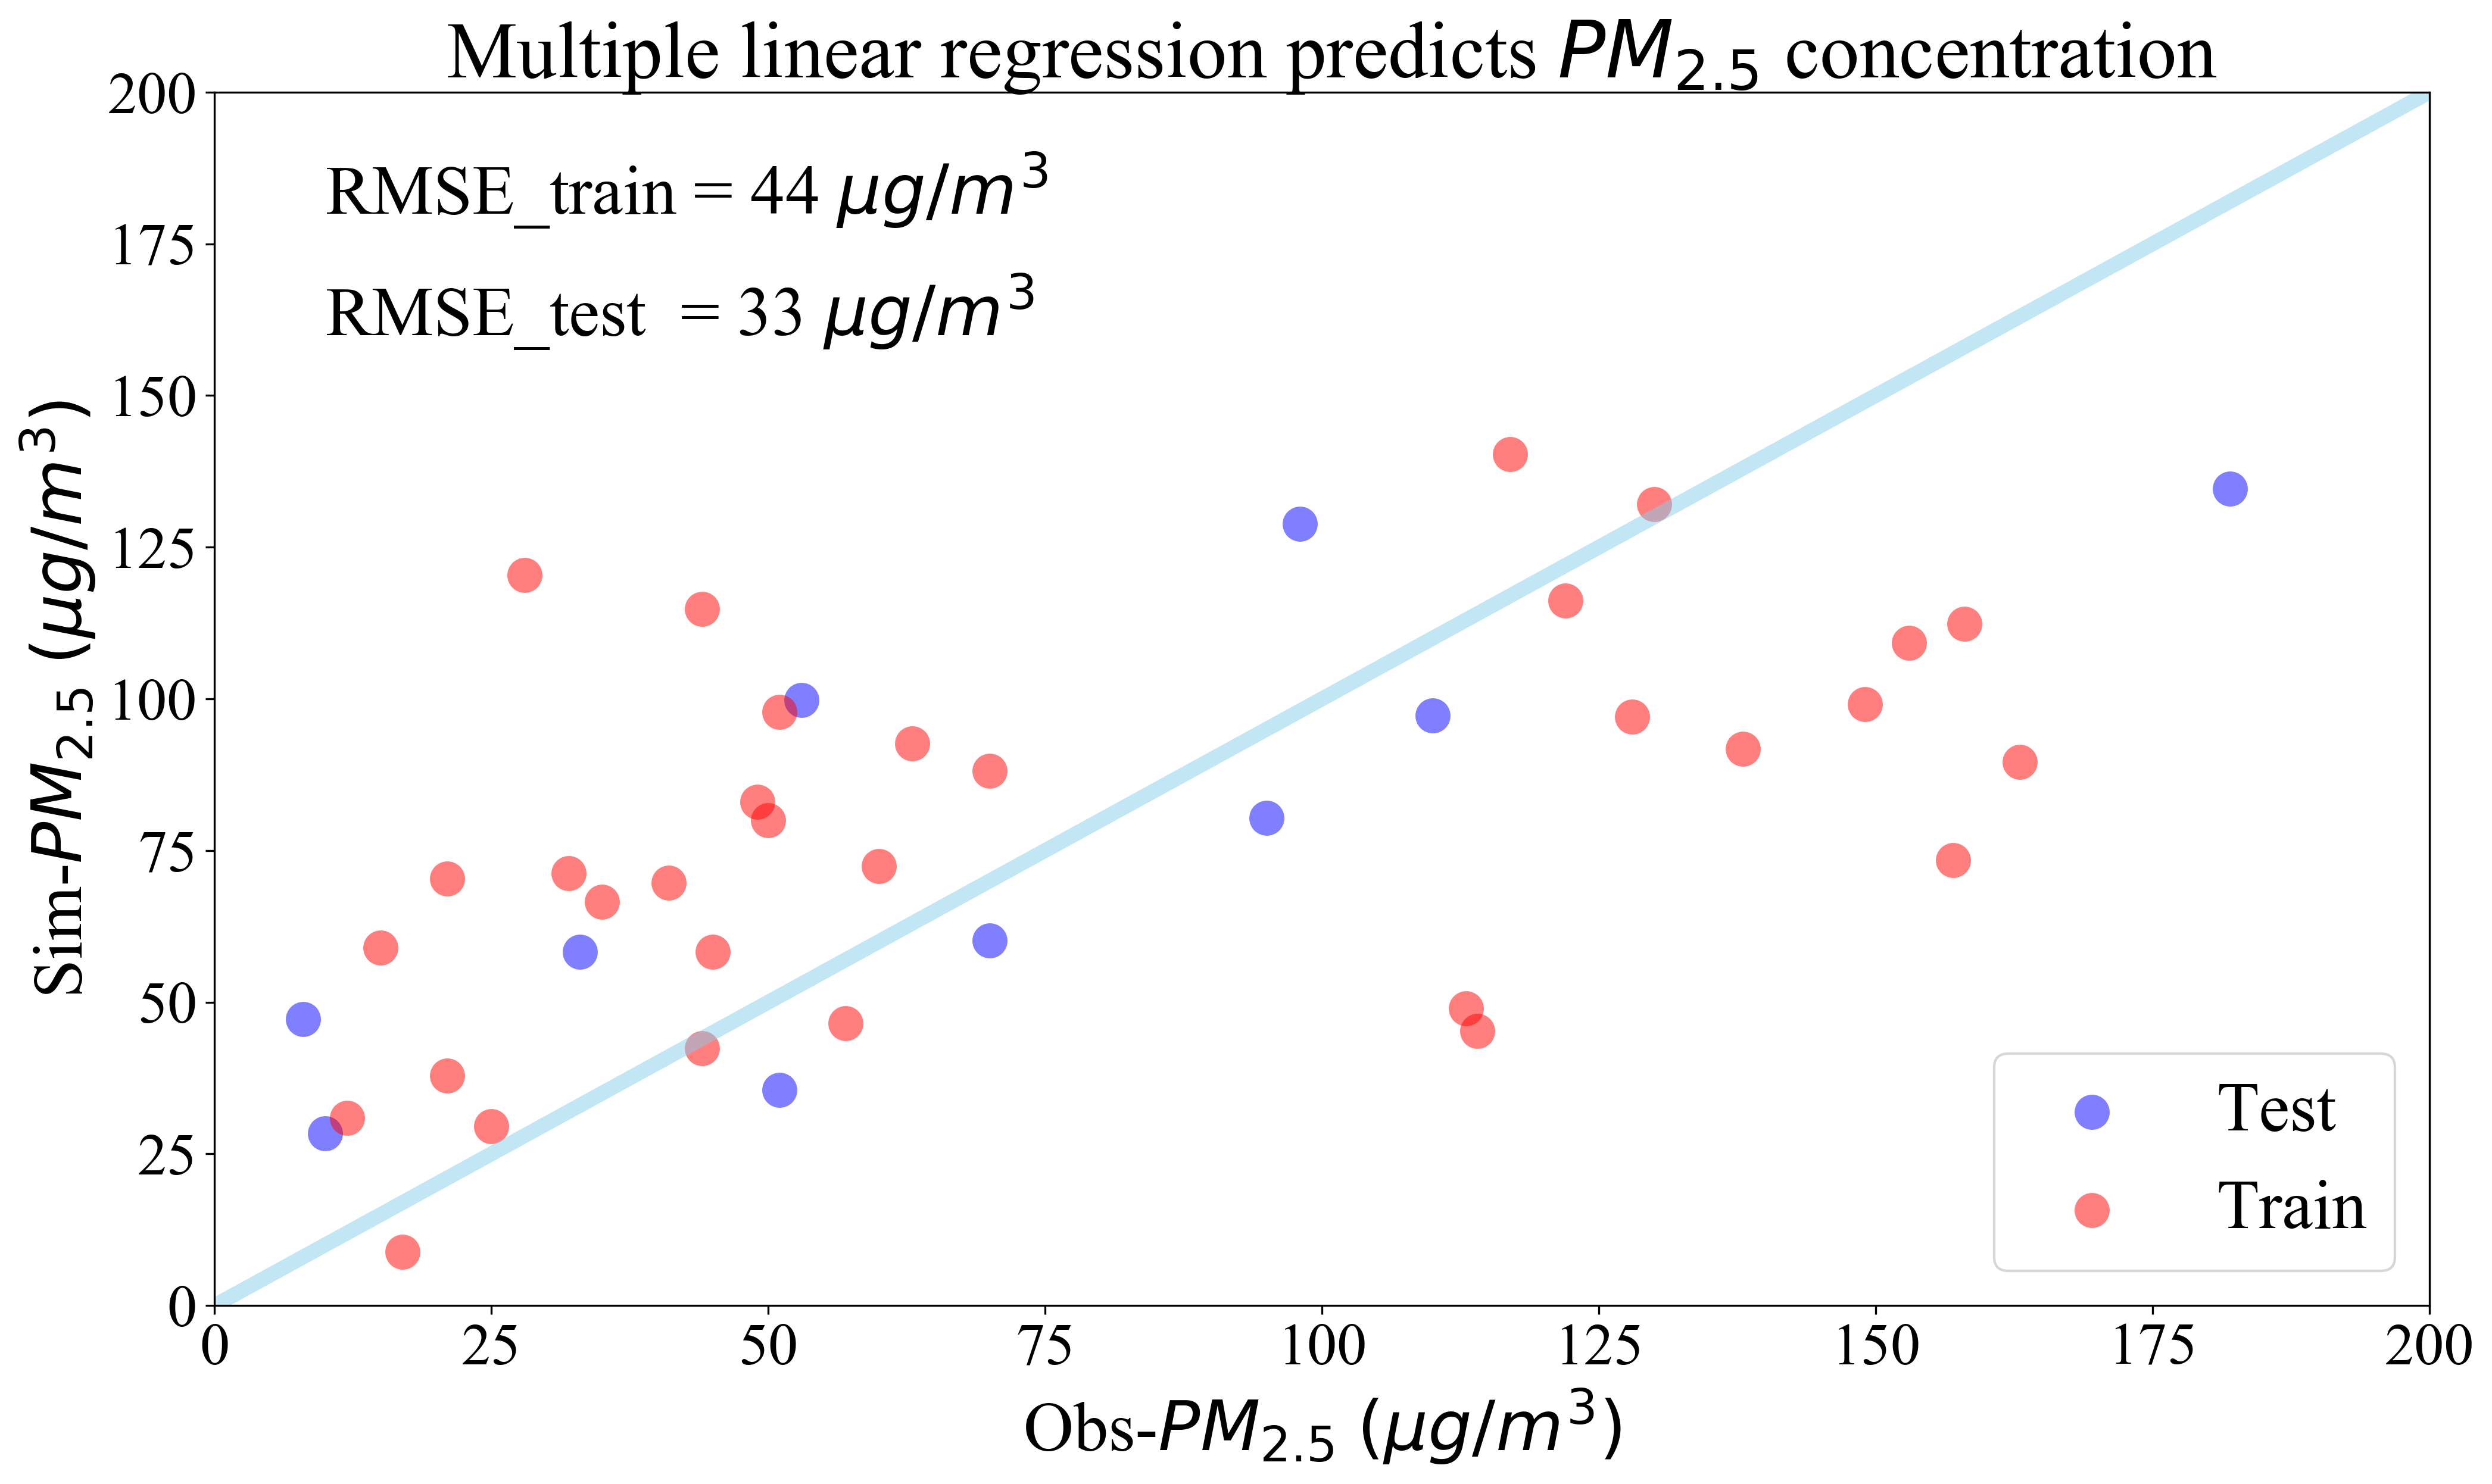

In [17]:
import math
RMSE_train=math.sqrt(mean_squared_error(y_train,y_train_pred))
RMSE_test=math.sqrt(mean_squared_error(y_test,y_pred))
#MSE_test_A=mean_squared_error(y_test,y_pred)
#R2_train_A=r2_score(y_train,y_train_pred)
R2_test_A=r2_score(y_test,y_pred)
print(RMSE_train,RMSE_test)

fig = plt.figure(figsize=(16,9),dpi= 300)
plt.subplot(111)
plt.tick_params(labelsize=24)
#plt.plot(Time,PMC_sim,c='blue',marker = 'o',linewidth=3,alpha=0.5,label="Simulation")
#plt.plot(Time,PMC_obs,c='red', marker = 'o',linewidth=3,alpha=0.5,label="Observation")
#plt.scatter(PMC_obs,PMC_sim,c='red',s=200,marker = 'o',linewidth=0,alpha=0.5)
plt.scatter(y_test,y_pred,c='blue',s=200,marker = 'o',linewidth=0,alpha=0.5,label="Test")
plt.scatter(y_train,y_train_pred,c='red',s=200,marker = 'o',linewidth=0,alpha=0.5,label="Train")
x = np.arange(0, 200, 0.1)
y=x
plt.plot(x, y,c='skyblue',alpha=0.5,linewidth=6)
plt.ylim(0,200)
plt.xlim(0,200)
plt.legend(loc="lower right",fontsize=28) #显示图中的标签
plt.xlabel('Obs-$PM_{2.5}$'+ ' '+'$ (µg/m^3)$',fontsize=28)
plt.ylabel('Sim-$PM_{2.5}$'+ ' '+'$ (µg/m^3)$',fontsize=28)
titlestr=' Multiple linear regression predicts $PM_{2.5}$ concentration '
plt.title(titlestr,fontsize=32)
#plt.legend(loc="upper right",fontsize=28)
#plt.text(5,175,'Training set of model',fontsize=32)
plt.text(10,180,'RMSE_train = 44 $ µg/m^3$',fontsize=28)
plt.text(10,160,'RMSE_test  = 33 $ µg/m^3$',fontsize=28)
#plt.text(3,-30,'RMSE = 33 $ µg/m^3$,Intercept = 79 $ µg/m^3$',fontsize=28)
plt.savefig(str(titlestr)+'.png')
plt.show()

In [18]:
#以下为决策树回归

MSE_train=[]
MSE_test=[]
R2_train=[]
R2_test=[]

for i in Ran:
    X=AQI[x_cols]
    y=AQI[y_cols]
    X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=i)
    titlestr=str(i)+' Predict the particle concentration '
    #print(titlestr)
    regr = DecisionTreeRegressor(max_depth=3)
    regr.fit(X_train, y_train)
    y_train_pred=regr.predict(X_train)
    y_pred = regr.predict(X_test)
    from sklearn import metrics
    
    MSE_train_A=mean_squared_error(y_train,y_train_pred)
    MSE_test_A=mean_squared_error(y_test,y_pred)
    R2_train_A=r2_score(y_train,y_train_pred)
    R2_test_A=r2_score(y_test,y_pred)
    
    MSE_train.append(MSE_train_A)
    MSE_test.append(MSE_test_A)
    R2_train.append(R2_train_A)
    R2_test.append(R2_test_A)
    
    #print ('MSE train: %.3f,test:%.3f' % (mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_pred)))
#评估决定系数(coefficient of determination)，是MSE的标准化
    #print ('R^2 train: %.3f,test:%.3f' % (r2_score(y_train,y_train_pred),r2_score(y_test,y_pred)))

In [19]:
MSE_train=np.array(MSE_train)
print(MSE_train.min())
print(MSE_train.argmin(axis=0))

MSE_test=np.array(MSE_test)
print(MSE_test.min())
print(MSE_test.argmin(axis=0))

R2_train=np.array(R2_train)
print(R2_train.max())
print(R2_train.argmax(axis=0))

R2_test=np.array(R2_test)
print(R2_test.max())
print(R2_test.argmax(axis=0))

323.149334251607
30
1036.128932054105
27
0.8935734290079185
80
0.4890577360627105
14


MSE train: 60.910,test:456.932
7.804473871428645 21.37596356148228


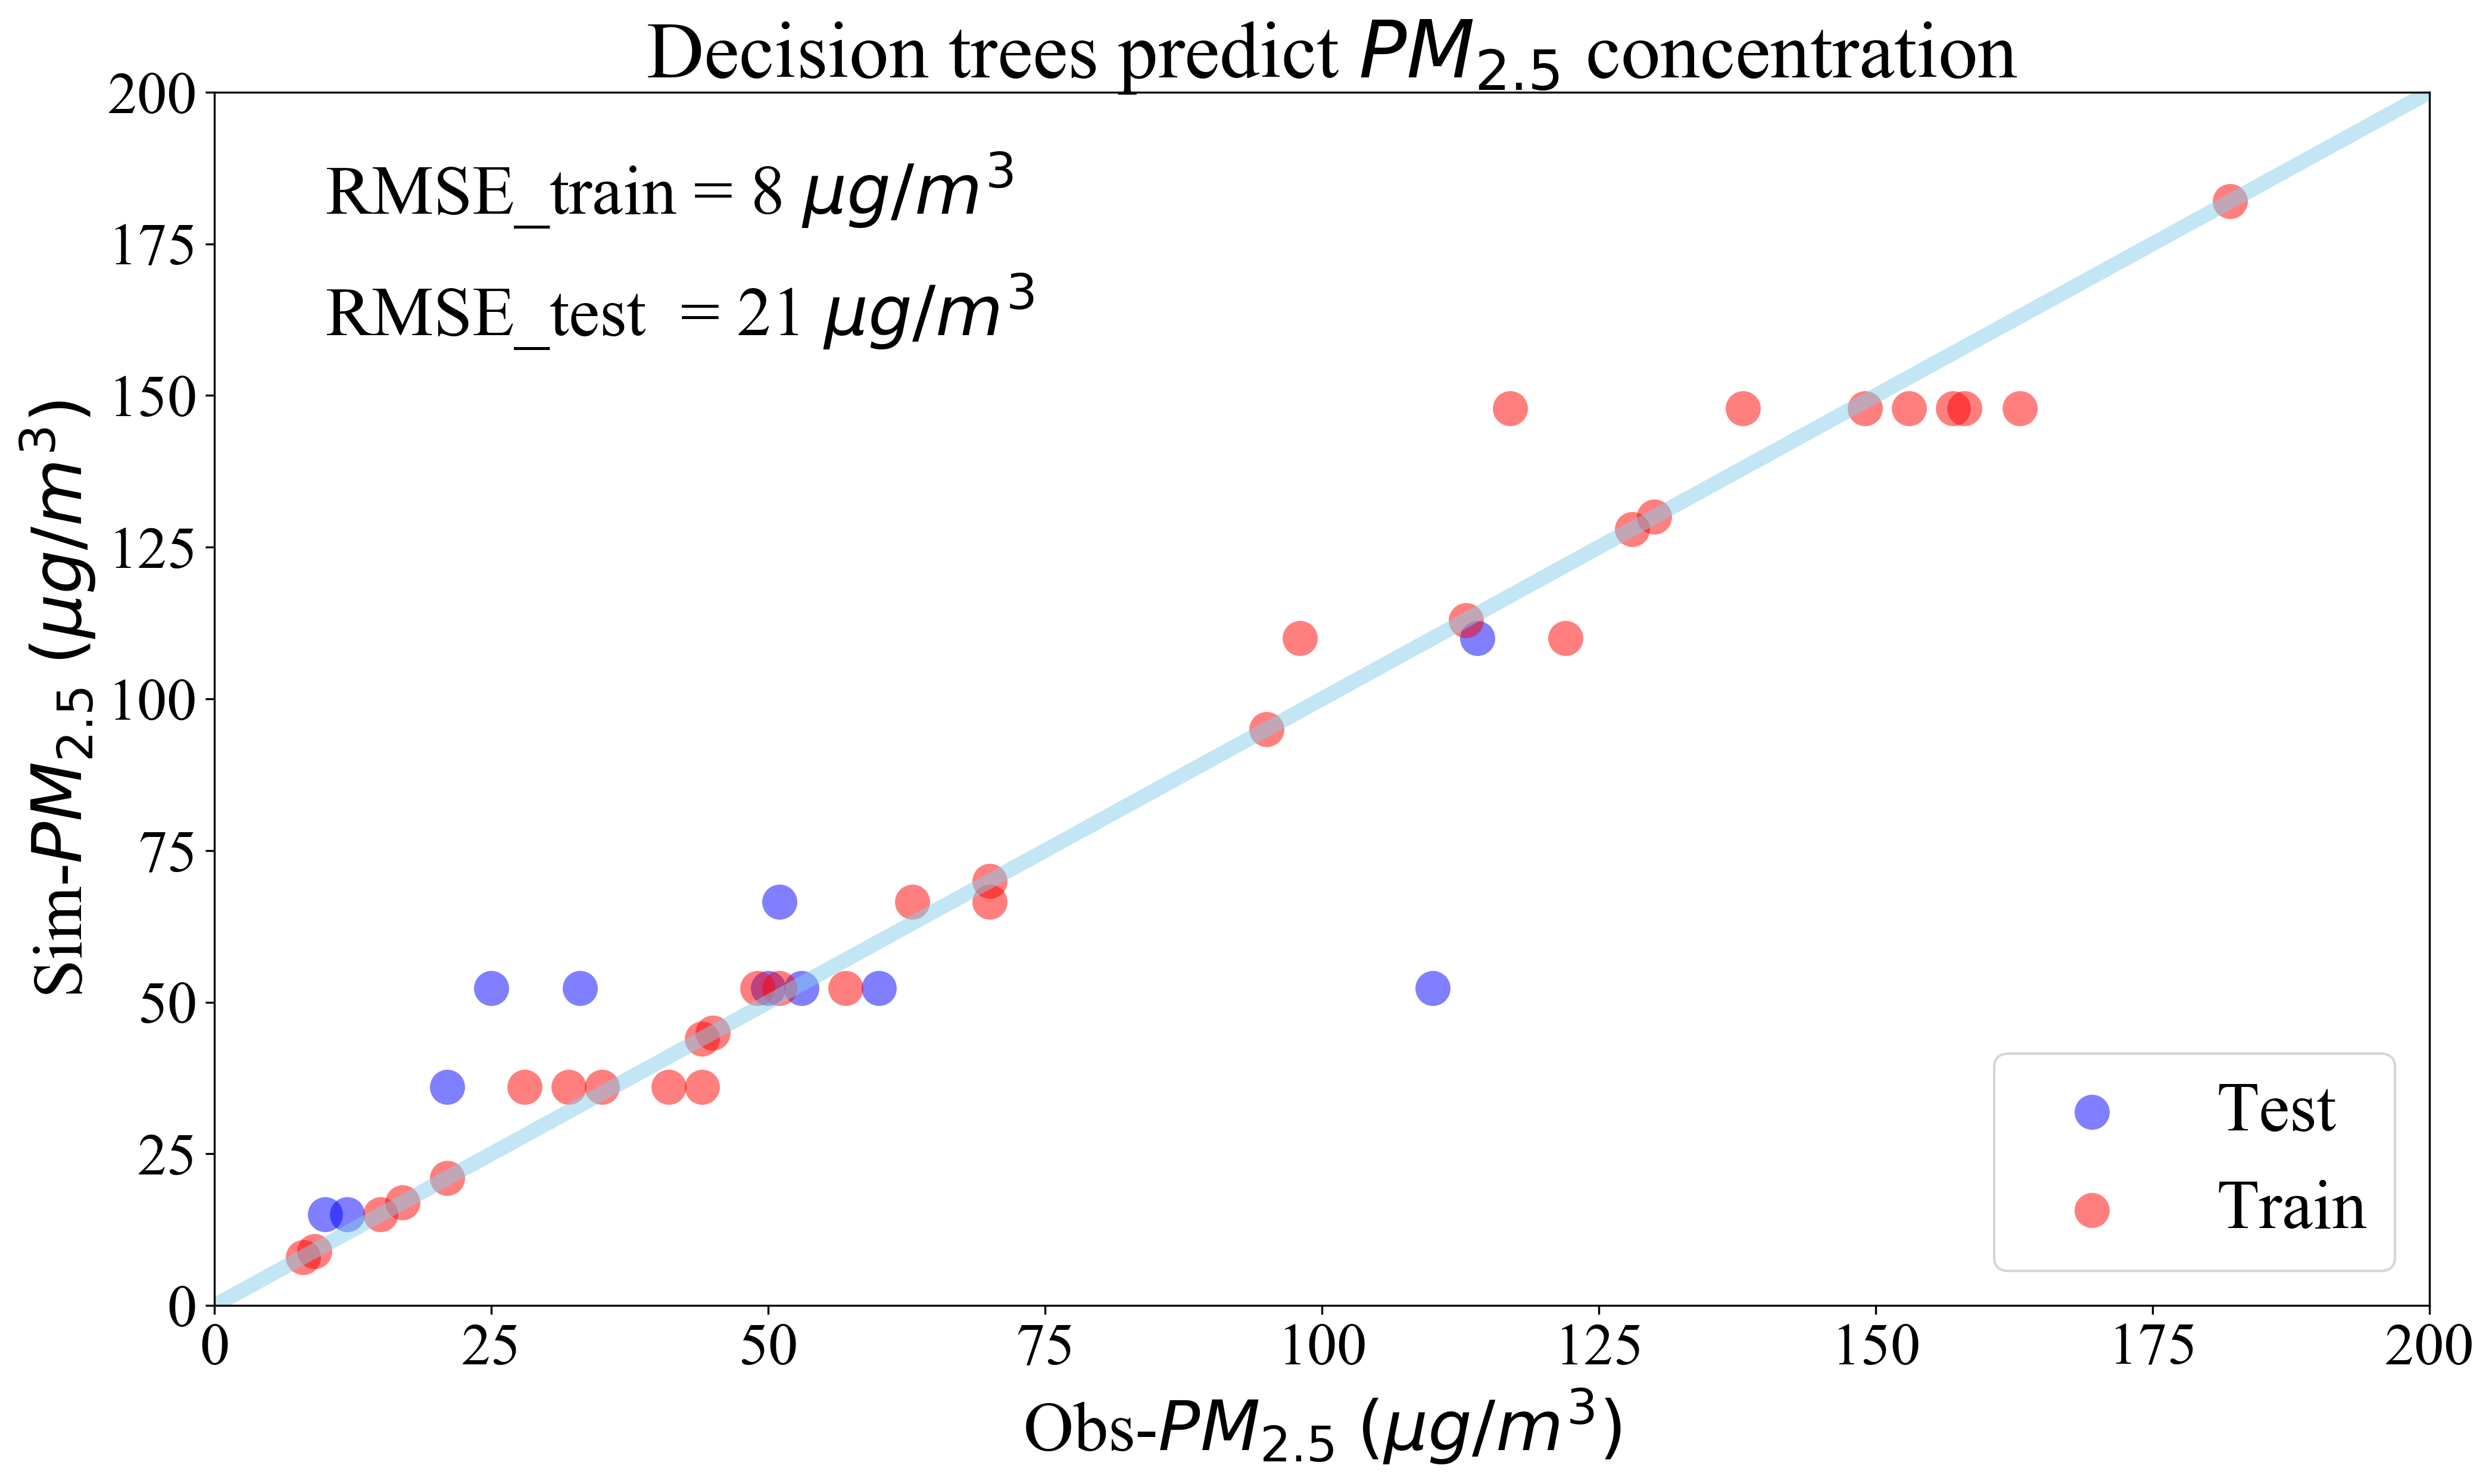

In [29]:
import math
X=AQI[x_cols]
y=AQI[y_cols]
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=28)
regr = DecisionTreeRegressor(max_depth=6)
regr.fit(X_train, y_train)
y = regr.predict(X_test)
y_train_pred=regr.predict(X_train)
y_pred = regr.predict(X_test)
from sklearn import metrics
print ('MSE train: %.3f,test:%.3f' % (mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_pred)))
#评估决定系数(coefficient of determination)，是MSE的标准化
#print ('R^2 train: %.3f,test:%.3f' % (r2_score(y_train,y_train_pred),r2_score(y_test,y_pred)))
RMSE_train=math.sqrt(mean_squared_error(y_train,y_train_pred))
RMSE_test=math.sqrt(mean_squared_error(y_test,y_pred))
#MSE_test_A=mean_squared_error(y_test,y_pred)
#R2_train_A=r2_score(y_train,y_train_pred)
R2_test_A=r2_score(y_test,y_pred)
print(RMSE_train,RMSE_test)
fig = plt.figure(figsize=(16,9),dpi= 300)
plt.subplot(111)
plt.tick_params(labelsize=24)
#plt.plot(Time,PMC_sim,c='blue',marker = 'o',linewidth=3,alpha=0.5,label="Simulation")
#plt.plot(Time,PMC_obs,c='red', marker = 'o',linewidth=3,alpha=0.5,label="Observation")
plt.scatter(y_test,y_pred,c='blue',s=200,marker = 'o',linewidth=0,alpha=0.5,label="Test")
plt.scatter(y_train,y_train_pred,c='red',s=200,marker = 'o',linewidth=0,alpha=0.5,label="Train")
x = np.arange(0, 200, 0.1)
y=x
plt.plot(x, y,c='skyblue',alpha=0.5,linewidth=6)
plt.ylim(0,200)
plt.xlim(0,200)
#plt.legend(loc="upper right",fontsize=28) #显示图中的标签
plt.xlabel('Obs-$PM_{2.5}$'+ ' '+'$ (µg/m^3)$',fontsize=28)
plt.ylabel('Sim-$PM_{2.5}$'+ ' '+'$ (µg/m^3)$',fontsize=28)
plt.legend(loc="lower right",fontsize=28)
titlestr=' Decision trees predict $PM_{2.5}$ concentration'
plt.title(titlestr,fontsize=32)
#plt.text(5,175,'Training set of model',fontsize=32)
plt.text(10,180,'RMSE_train = 8 $ µg/m^3$',fontsize=28)
plt.text(10,160,'RMSE_test  = 21 $ µg/m^3$',fontsize=28)
plt.savefig(str(titlestr)+'.png')
plt.show()

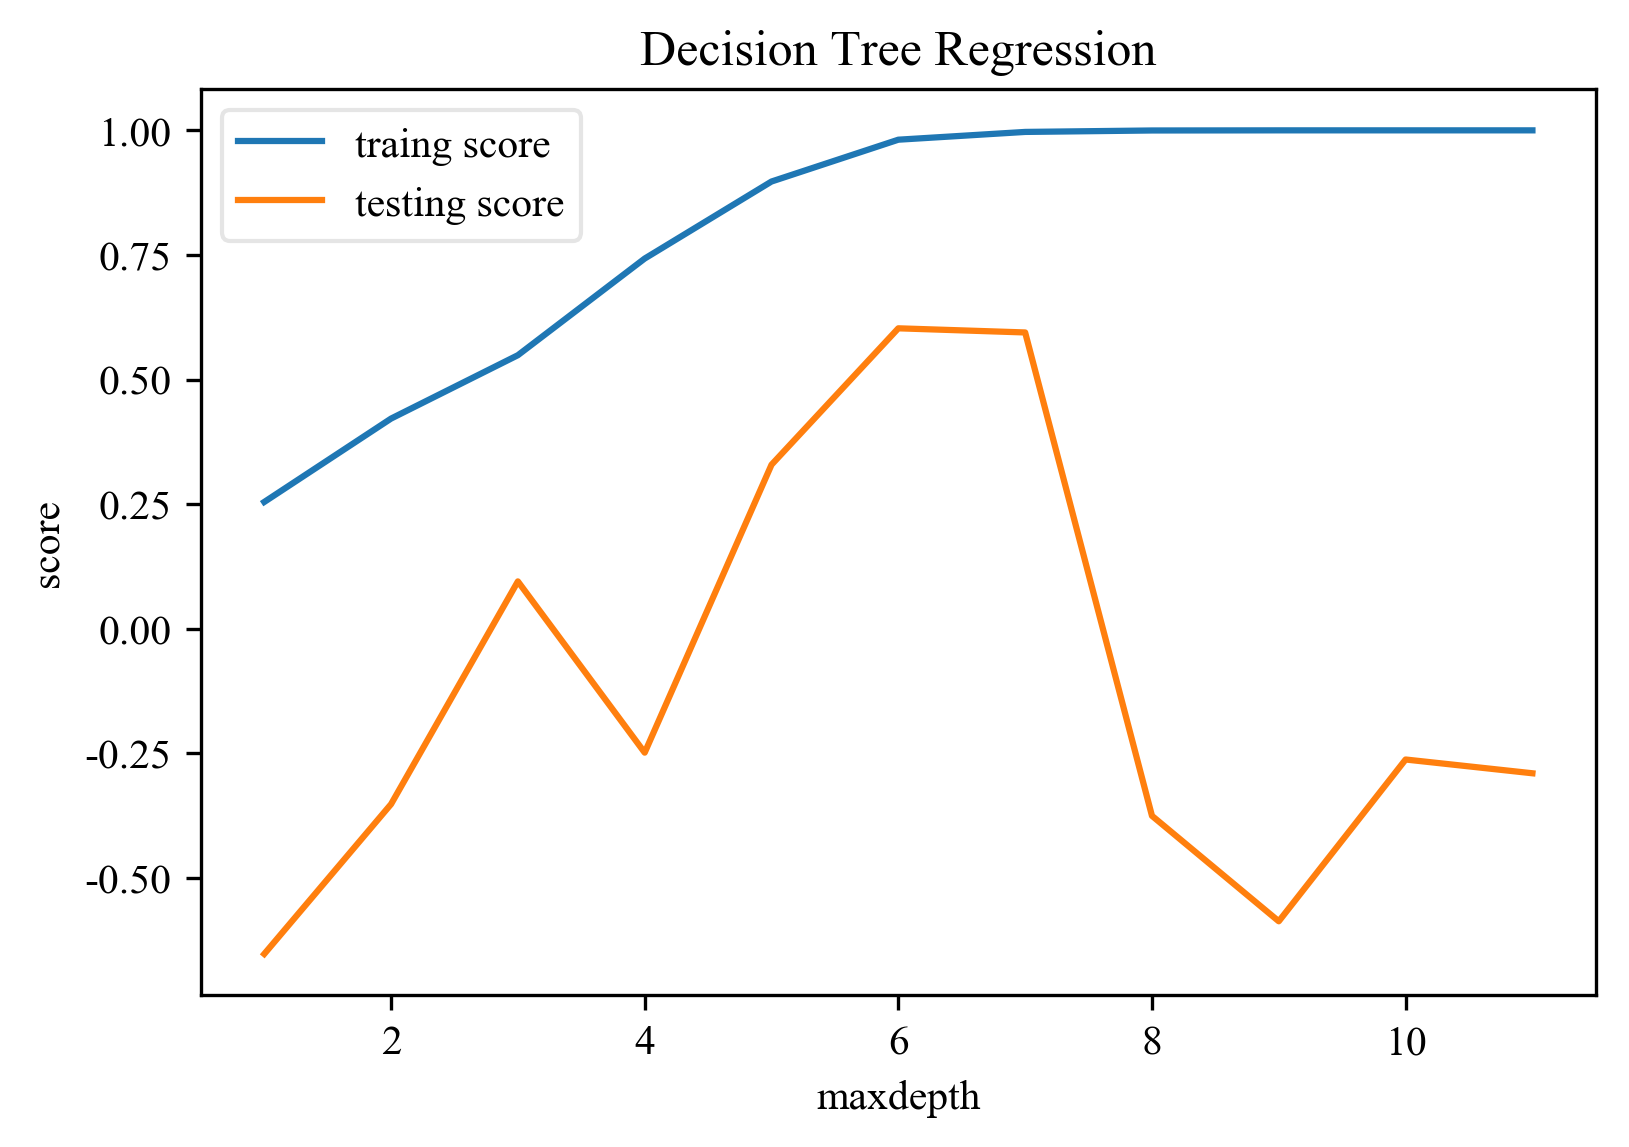

In [38]:
from sklearn import model_selection

def test_DecisionTreeRegressor_depth(*data,maxdepth):
    X_train,X_test,y_train,y_test=data
    depths=np.arange(1,maxdepth)
    training_scores=[]
    testing_scores=[]
    for depth in depths:
        regr = DecisionTreeRegressor(max_depth=depth)
        regr.fit(X_train, y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))

    ## 绘图
    fig=plt.figure(dpi= 300)
    ax=fig.add_subplot(1,1,1)
    ax.plot(depths,training_scores,label="traing score")
    ax.plot(depths,testing_scores,label="testing score")
    ax.set_xlabel("maxdepth")
    ax.set_ylabel("score")
    ax.set_title("Decision Tree Regression")
    ax.legend(framealpha=0.5)
    plt.show()
       
test_DecisionTreeRegressor_depth(X_train,X_test,y_train,y_test,maxdepth=12)

In [40]:
import pydotplus
from sklearn import tree
dot_data = tree.export_graphviz(regr, filled=True,rounded=True,special_characters=True,feature_names=x_cols) 
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_pdf("日照决策树.pdf")

True